In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
iris = pd.read_csv("datairis.csv")

In [59]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

### 2. Data Visualisasi

2.1 Scatterplot

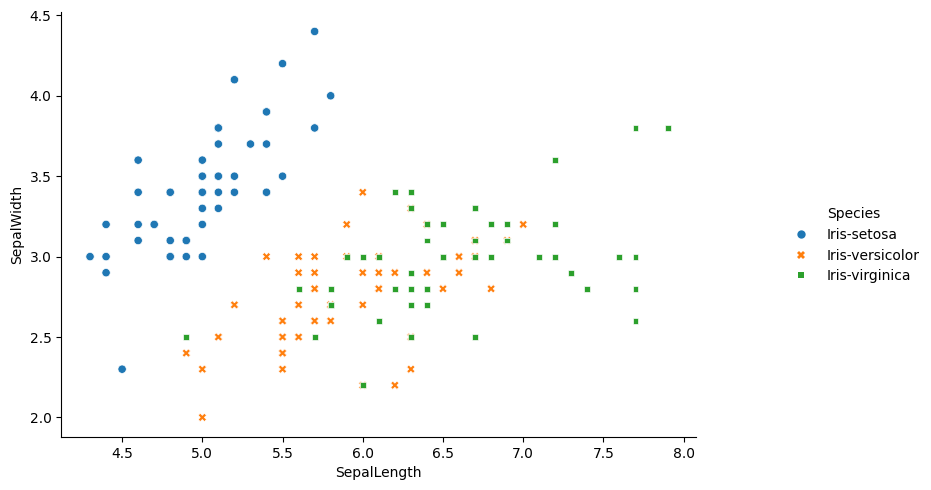

In [61]:
g=sns.relplot(x='SepalLength',y='SepalWidth',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

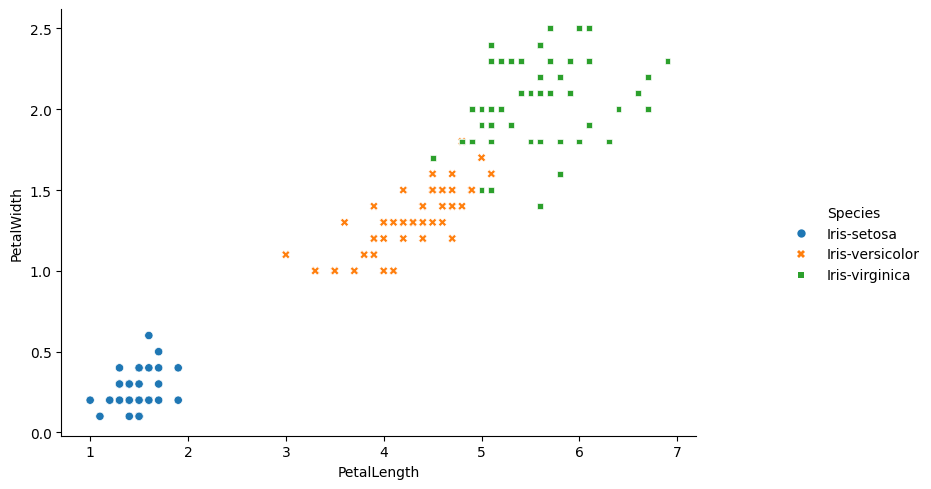

In [62]:
g=sns.relplot(x='PetalLength',y='PetalWidth',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

2.2 Pairplot

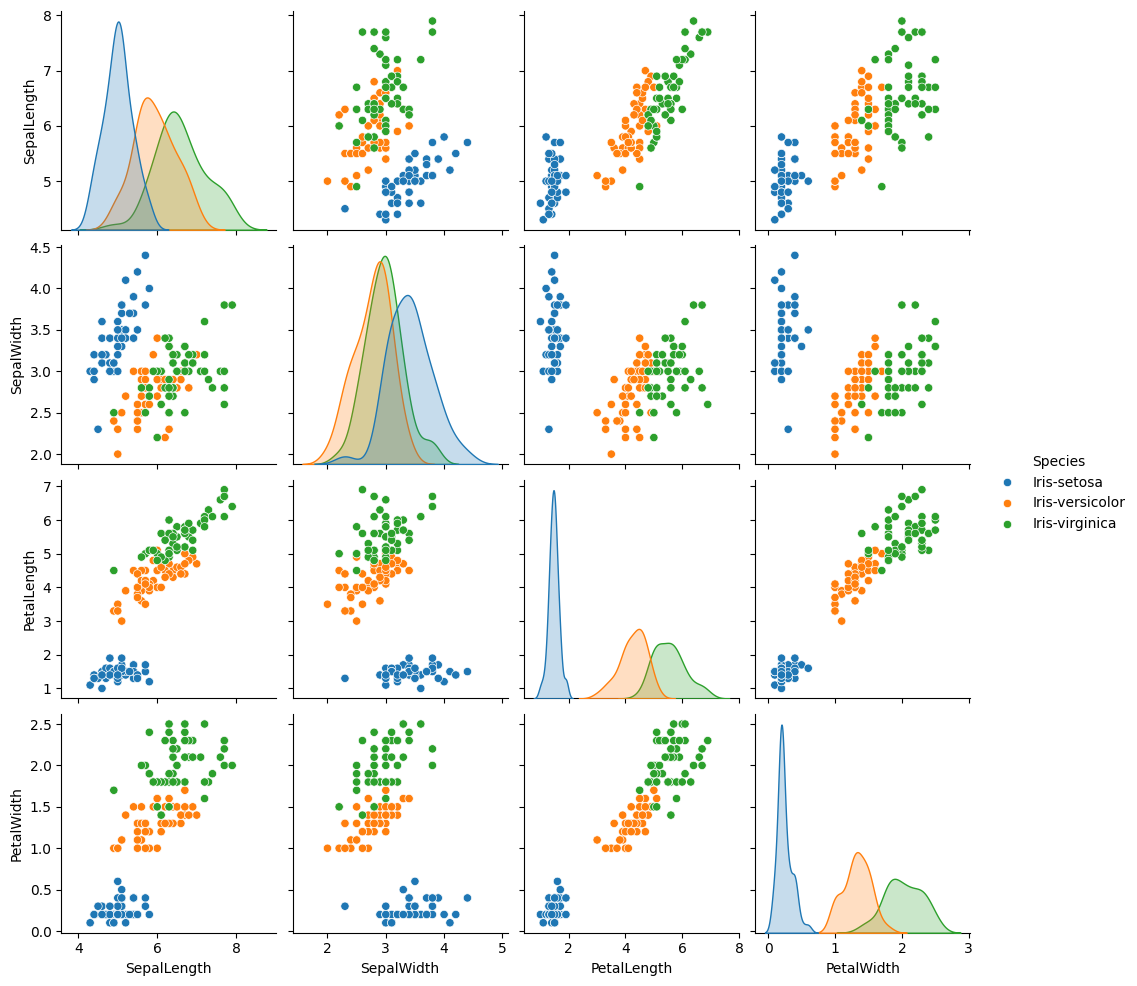

In [63]:
sns.pairplot(iris,hue="Species")
plt.show()

2.3 Boxplot

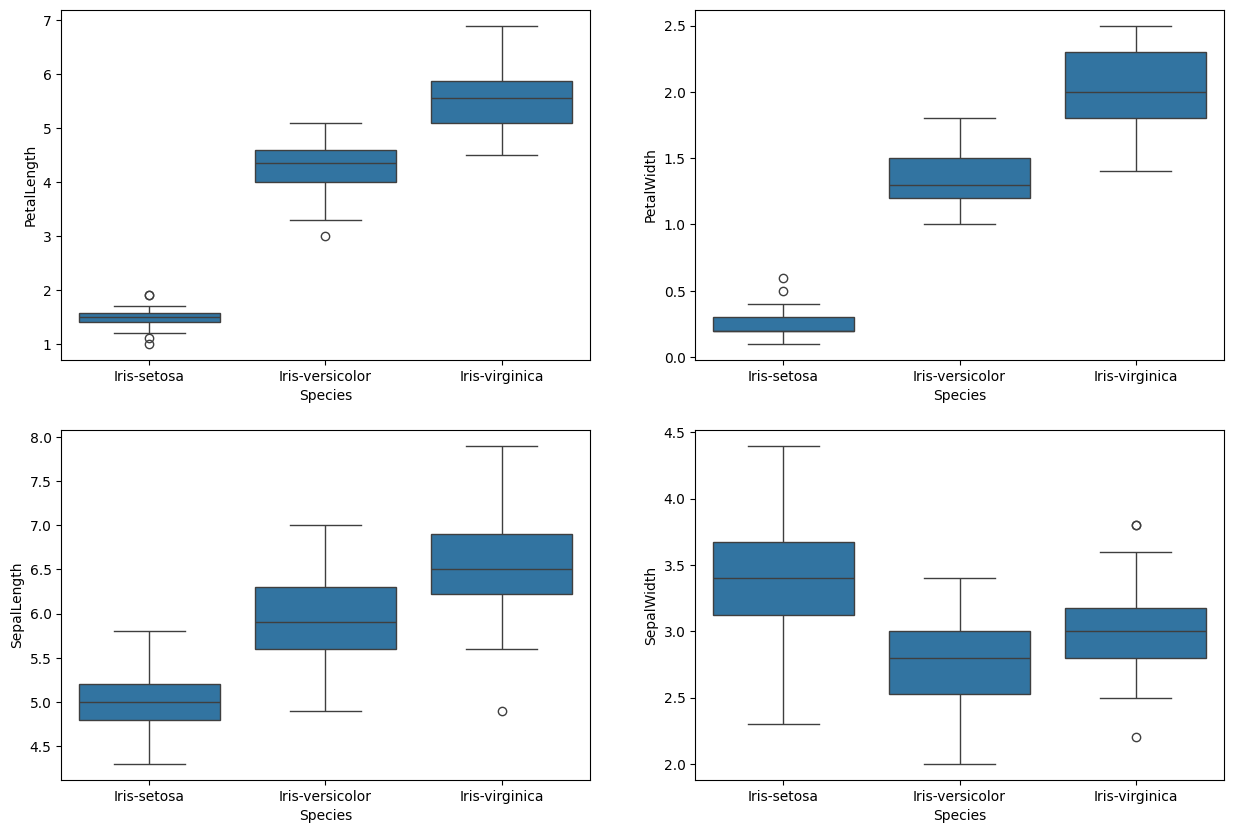

In [64]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLength',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidth',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLength',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidth',data=iris)
plt.show()

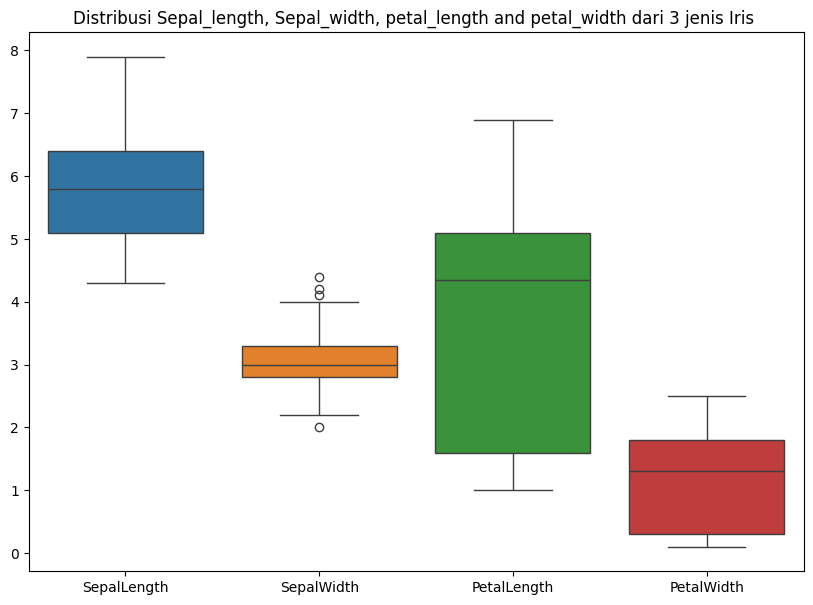

In [65]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribusi Sepal_length, Sepal_width, petal_length and petal_width dari 3 jenis Iris ")
plt.show()

2.4 Violin

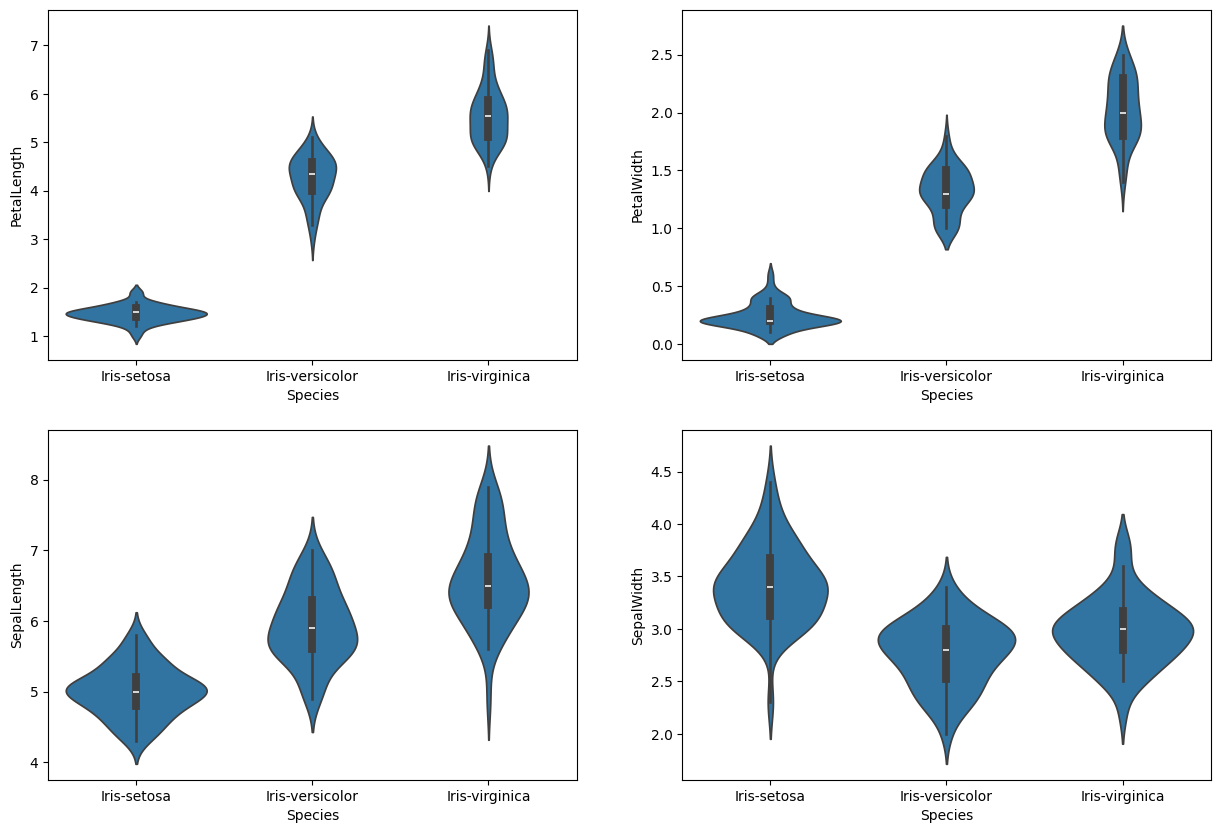

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLength',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidth',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLength',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidth',data=iris)
plt.show()

/home/bryan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bryan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bryan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


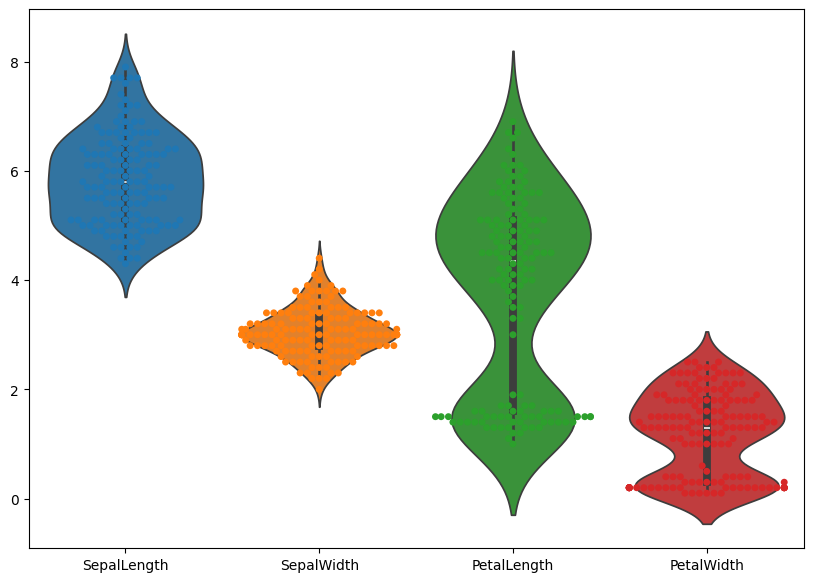

In [67]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=iris)
sns.swarmplot( data=iris)
plt.show()

2.5 Areaplot

<Axes: >

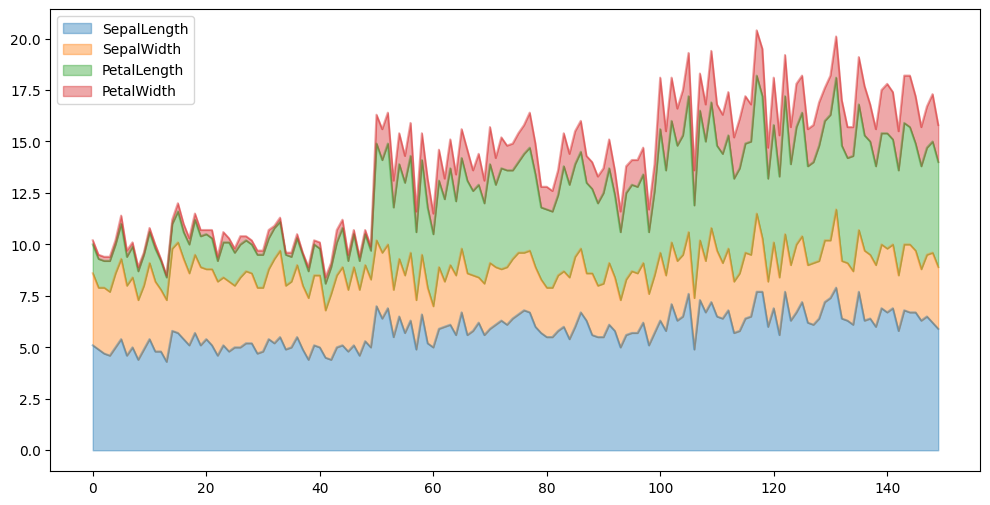

In [68]:
iris.plot.area(y=['SepalLength','SepalWidth','PetalLength','PetalWidth'],alpha=0.4,figsize=(12, 6))

2.6 Correlation

In [69]:
# Select only numeric columns
numeric_columns = iris.select_dtypes(include=[np.number])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()


In [70]:
correlation_matrix.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.941225,0.975716,0.963204
SepalWidth,-0.941225,1.000000,-0.992071,-0.994744
PetalLength,0.975716,-0.992071,1.000000,0.997991
PetalWidth,0.963204,-0.994744,0.997991,1.000000


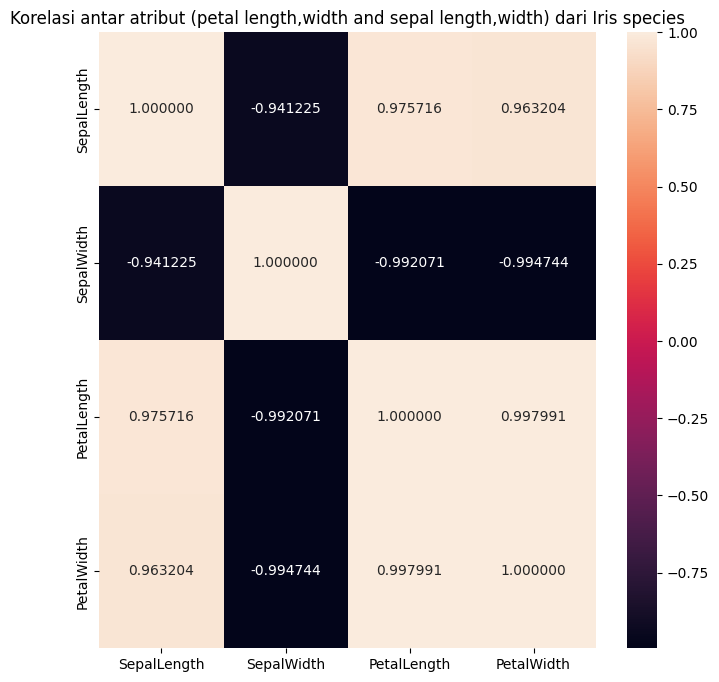

In [71]:
plt.subplots(figsize = (8,8))
sns.heatmap(correlation_matrix.corr(),annot=True,fmt="f").set_title("Korelasi antar atribut (petal length,width and sepal length,width) dari Iris species")
plt.show()

### Feature Selection

<img src="imageiris.png">

### Data iris terdiri dari 5 kolom, 4 sebagai fitur dari data iris, 1 sebagai label (kelas label)

In [72]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values
feature_cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

Mengubah kelas label menjadi 1 dan 0 (label encoder)

<img src="labelencoder.png">

### 3. Building Machine Learning Models

In [73]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Splitting The Data into Training And Testing Dataset

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

3.1. Building Decision Tree Model

criterion --> default ='gini'; lainnya "entropy"

In [75]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


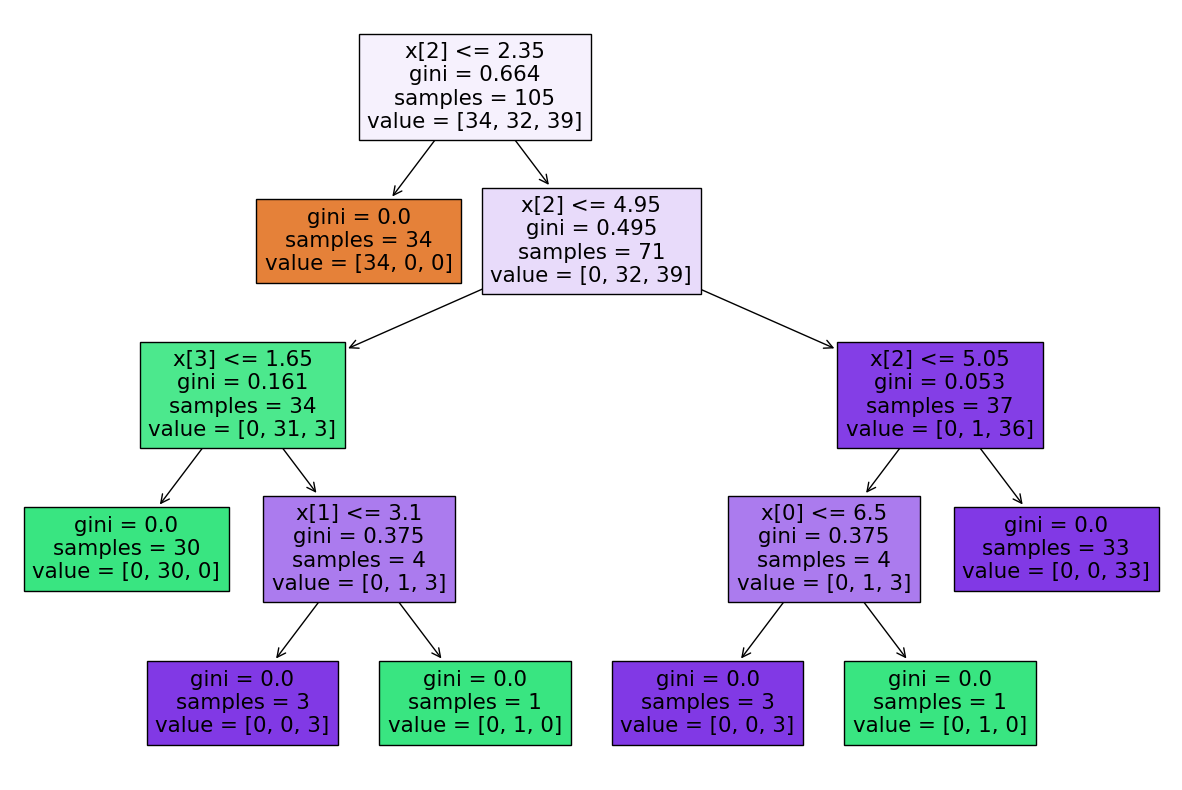

In [76]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

In [77]:
decision_tree = DecisionTreeClassifier(criterion="entropy",max_depth=3) 
decision_tree= decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


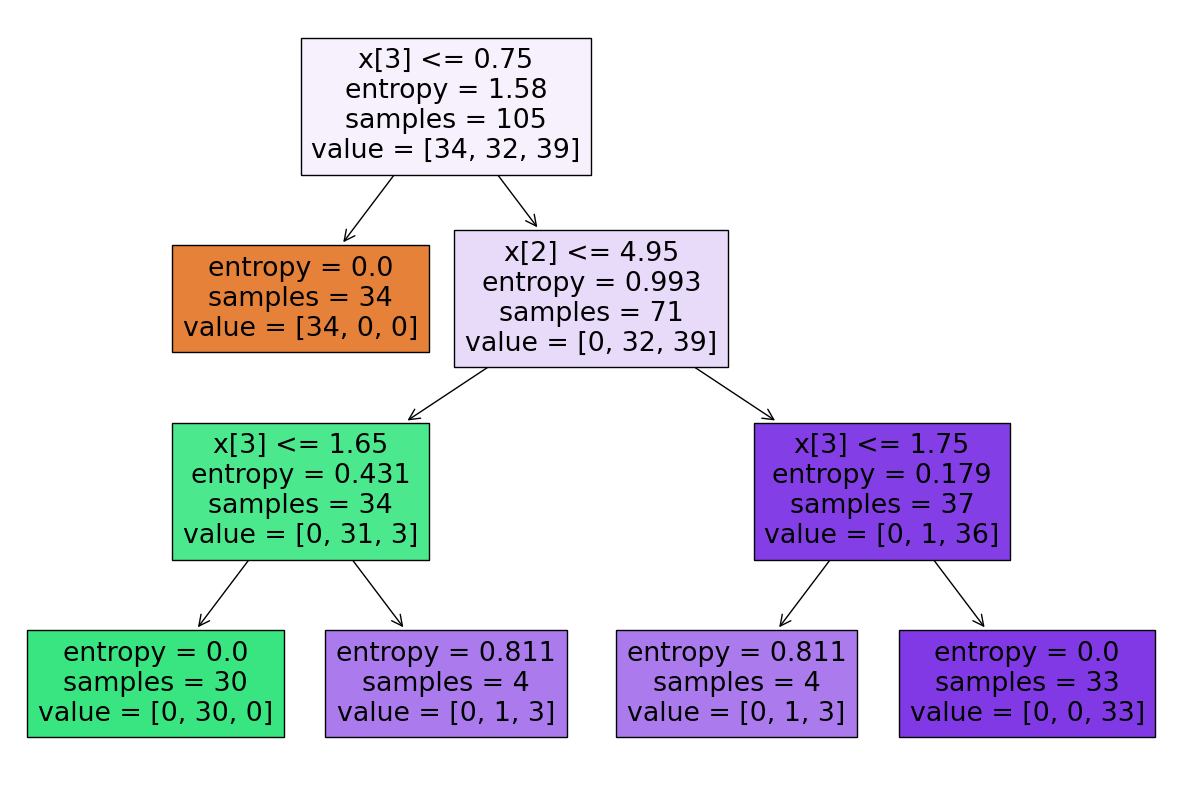

In [78]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

3.2. Random Forest Model

In [79]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


3.3. KNN

In [80]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


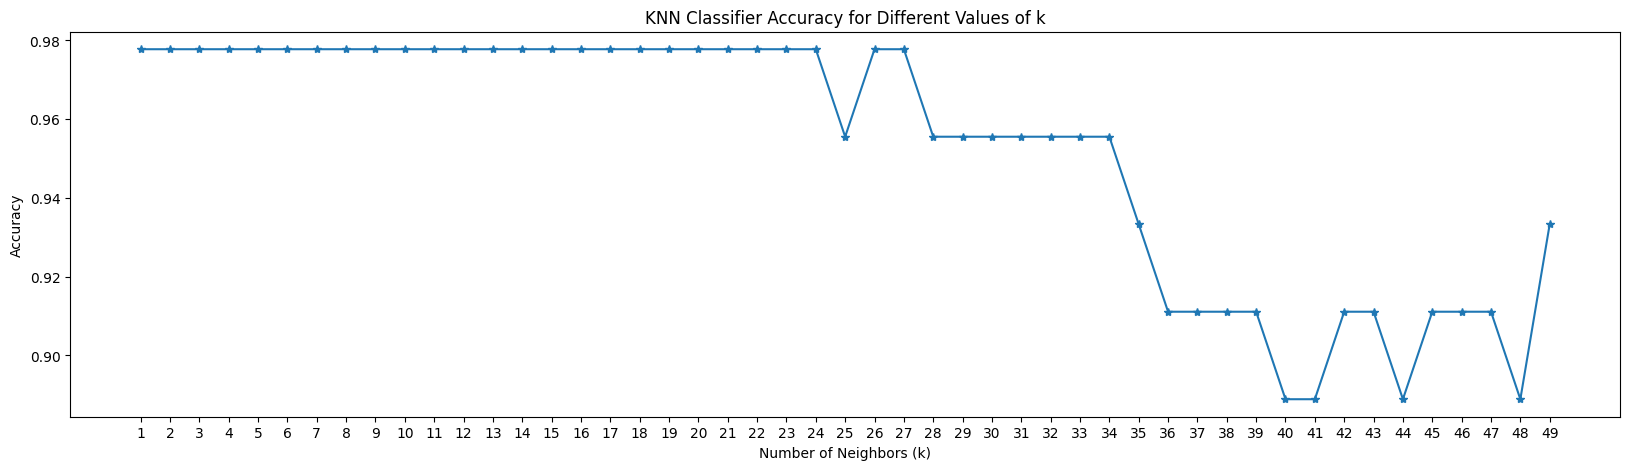

In [82]:
accuracy_values = []  # Create an empty list to store accuracy values

for i in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    accuracy_values.append(accuracy)  # Append accuracy value to the list

# Convert the list to a Pandas Series
a_index = list(range(1, 50))
a = pd.Series(accuracy_values)

# Plot the accuracy values
plt.subplots(figsize=(20, 5))
plt.plot(a_index, a, marker="*")
plt.xticks(range(1, 50))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different Values of k')
plt.show()


3.4 Gaussian Naive Bayes:

In [83]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


3.5 Linear Support Vector Machine:

In [84]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_Naive Bayes: 0.933
precision_Naive Bayes: 0.933
recall_Naive Bayes: 0.933
f1-score_Naive Bayes : 0.933


/home/bryan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


3.6. Logistic Regression:

In [85]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_Logistic Regression : 0.978
precision_Logistic Regression : 0.978
recall_Logistic Regression: 0.978
f1-score_Logistic Regression : 0.978


In [86]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
accuracy_adaboost=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_adaboost = round(model.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Adaboost\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Adaboost
 [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]
accuracy_Logistic Regression : 0.911
precision_Logistic Regression : 0.911
recall_Logistic Regression: 0.911
f1-score_Logistic Regression : 0.911


In [87]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              'Support Vector Machine', 
              'Decision Tree',
             'Adaboost'],
    'Score': [ acc_knn,
              acc_log, 
              acc_random_forest,
              acc_gaussian,  
              acc_linear_svc,
              acc_decision_tree,
              acc_adaboost],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_dt,
                      accuracy_adaboost
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Naive Bayes,94.29,100.00
1,KNN,96.19,97.78
2,Logistic Regression,98.10,97.78
3,Random Forest,100.00,97.78
4,Decision Tree,98.10,97.78
5,Support Vector Machine,98.10,93.33
6,Adaboost,96.19,91.11


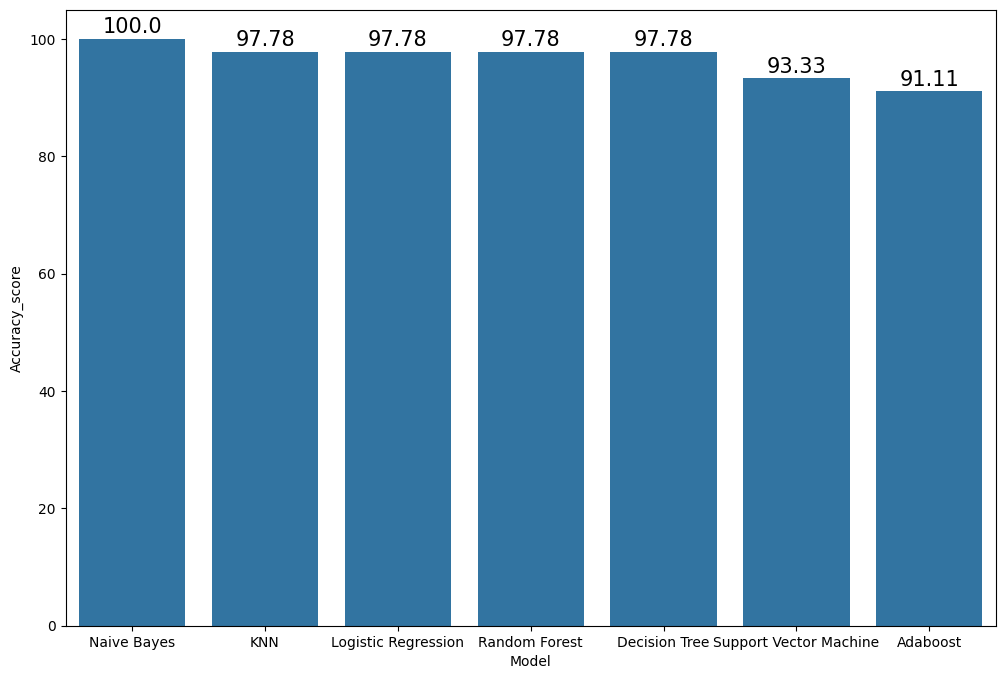

In [88]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')